<a href="https://colab.research.google.com/github/Shubham0Rajput/Feature-Detection-with-AKAZE/blob/master/AKAZE_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT FILES
import matplotlib.pyplot as plt
import cv2
#matplotlib inline

#MOUNTIING DRIVE
from google.colab import drive
drive.mount('/content/drive')

A-KAZE Matching Results
*******************************
# Keypoints 1:                        	 402
# Keypoints 2:                        	 717
# Matches:                            	 117
# Inliers:                            	 117
# Inliers Ratio:                      	 1.0
# Dist:                               	 111.68778049558038


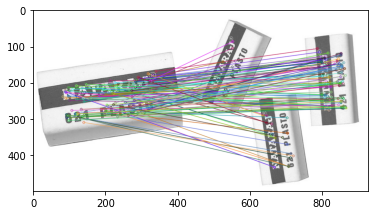

(<matplotlib.image.AxesImage at 0x7f16a6716da0>, None)

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
from math import sqrt
import matplotlib.pyplot as plt

#parser = argparse.ArgumentParser(description='Code for AKAZE local features matching tutorial.')
#parser.add_argument('--input1', help='Path to input image 1.', default='graf1.png')
#parser.add_argument('--input2', help='Path to input image 2.', default='graf3.png')
#parser.add_argument('--homography', help='Path to the homography matrix.', default='H1to3p.xml')
#args = parser.parse_args()

imge1 = cv.imread('/content/drive/My Drive/e2.jpg')   
img1 = cv.cvtColor(imge1, cv.COLOR_BGR2GRAY)       # queryImage

imge2 = cv.imread('/content/drive/My Drive/e3.jpg')   
img2 = cv.cvtColor(imge2, cv.COLOR_BGR2GRAY)       # trainImage



#img1 = cv.imread(cv.samples.findFile(args.input1), cv.IMREAD_GRAYSCALE)
#img2 = cv.imread(cv.samples.findFile(args.input2), cv.IMREAD_GRAYSCALE)
if img1 is None or img2 is None:
    print('Could not open or find the images!')
    exit(0)

fs = cv.FileStorage('/content/drive/My Drive/H1to3p.xml', cv.FILE_STORAGE_READ)
homography = fs.getFirstTopLevelNode().mat()

## [load]

## [AKAZE]
akaze = cv.AKAZE_create()
kpts1, desc1 = akaze.detectAndCompute(img1, None)
kpts2, desc2 = akaze.detectAndCompute(img2, None)
## [AKAZE]

## [2-nn matching]
matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_BRUTEFORCE_HAMMING)
nn_matches = matcher.knnMatch(desc1, desc2, 2)
## [2-nn matching]

## [ratio test filtering]
matched1 = []
matched2 = []
nn_match_ratio = 0.8 # Nearest neighbor matching ratio
for m, n in nn_matches:
    if m.distance < nn_match_ratio * n.distance:
        matched1.append(kpts1[m.queryIdx])
        matched2.append(kpts2[m.trainIdx])
## [ratio test filtering]

## [homography check]
inliers1 = []
inliers2 = []
good_matches = []
inlier_threshold = 2.5 # Distance threshold to identify inliers with homography check
for i, m in enumerate(matched1):
    col = np.ones((3,1), dtype=np.float64)
    col[0:2,0] = m.pt

    col = np.dot(homography, col)
    col /= col[2,0]
    dist = sqrt(pow(col[0,0] - matched2[i].pt[0], 2) +\
                pow(col[1,0] - matched2[i].pt[1], 2))

    if dist > inlier_threshold:
        good_matches.append(cv.DMatch(len(inliers1), len(inliers2), 0))
        inliers1.append(matched1[i])
        inliers2.append(matched2[i])
## [homography check]

## [draw final matches]
res = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
img0 = cv.drawMatches(img1, inliers1, img2, inliers2, good_matches, res)
#img0 = cv.drawMatchesKnn(img1,inliers1,img2,inliers2,res,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv.imwrite("akaze_result.png", res)

inlier_ratio = len(inliers1) / float(len(matched1))
print('A-KAZE Matching Results')
print('*******************************')
print('# Keypoints 1:                        \t', len(kpts1))
print('# Keypoints 2:                        \t', len(kpts2))
print('# Matches:                            \t', len(matched1))
print('# Inliers:                            \t', len(inliers1))
print('# Inliers Ratio:                      \t', inlier_ratio)
print('# Dist:                               \t', dist)

plt.imshow(img0),plt.show()
## [draw final matches]